<h4> Exploratory Data Analysis (EDA) </h4>

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [179]:
pd.set_option('mode.chained_assignment', None)

In [180]:
path = "Dataset/heart.csv"
heart_df = pd.read_csv(path)

print("Shape:", heart_df.shape)

Shape: (303, 14)


In [181]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [182]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [183]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [184]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h4> 1. Correlations, regression plot of 'chol' with 'oldpeak'. </h4>

In [185]:
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [186]:
heart_df[['age', 'sex', 'cp']].corr()

,age,sex,cp
age,1.000000,-0.098447,-0.068653
sex,-0.098447,1.000000,-0.049353
cp,-0.068653,-0.049353,1.000000


<AxesSubplot:xlabel='chol', ylabel='oldpeak'>

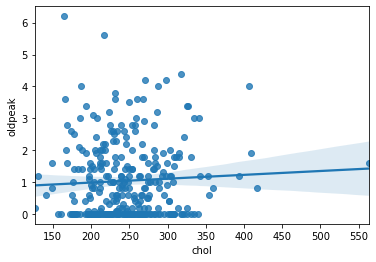

In [187]:
sns.regplot(x='chol', y='oldpeak', data=heart_df)

<AxesSubplot:xlabel='cp', ylabel='trestbps'>

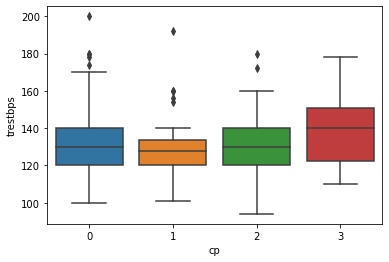

In [188]:
heart_df['age'].value_counts()
sns.boxplot(x='cp', y='trestbps', data=heart_df)

<h4> 1. Find average value of all the features and then showing the most specific ones (including trestbps, chol, and thalach) on bar-chart. </h4>

Average values
 trestbps    131.623762
chol        246.264026
thalach     149.646865
dtype: float64


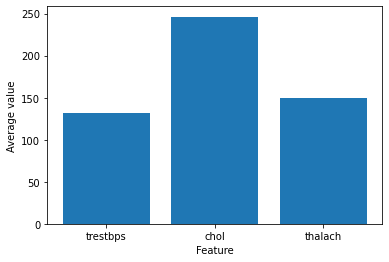

In [189]:
temp = heart_df[['trestbps', 'chol', 'thalach']]
mean = temp.mean()

print("Average values\n", mean)

fig, ax = plt.subplots()
ax.bar(mean.index, mean.values)
plt.xlabel('Feature')
plt.ylabel('Average value')
plt.show()

<h4> 2. Chest pain distribution in male and females separately. </h4>

<em>
    Chest pain severity ranges from 0-3.
    How many individuals come under these values?
</em>

207


Text(0.5, 1.0, 'Chest Pain Binning (Male)')

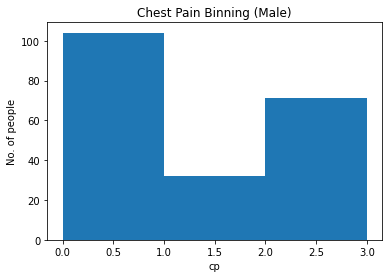

In [190]:
temp = heart_df[heart_df['sex'] == 1]

print(temp['sex'].count())

plt.hist(temp['cp'], bins = 3)
plt.xlabel('cp')
plt.ylabel('No. of people')
plt.title('Chest Pain Binning (Male)')

96


Text(0.5, 1.0, 'Chest Pain Binning (Female)')

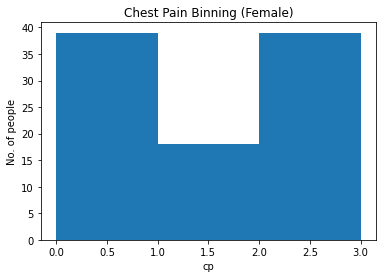

In [191]:
temp = heart_df[heart_df['sex'] == 0]

print(temp['sex'].count())

plt.hist(temp['cp'], bins = 3)
plt.xlabel('cp')
plt.ylabel('No. of people')
plt.title('Chest Pain Binning (Female)')

<h4> 3. Heart Disease Prediction (Yes and No) distribution in males w.r.t. age-groups. </h4>

Bins: [29. 45. 61. 77.]
Group Names: ['Young', 'Middle', 'Senior']


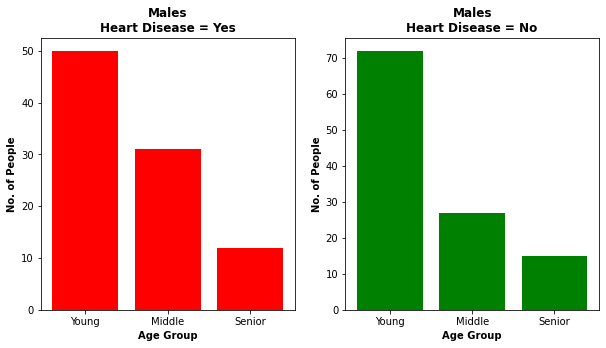

In [192]:
temp = heart_df.loc[heart_df['sex'] == 1]

bins = np.around(np.linspace(min(temp['age']), max(temp['age']), 4))
group_names = ['Young', 'Middle', 'Senior']

print("Bins:", bins)
print("Group Names:", group_names)

temp['age-bins'] = pd.cut(temp['age'], bins, labels=group_names, include_lowest=True)

temp = temp.sort_values(by=['age'], ascending=True)
temp = temp.reset_index(drop=True)

col_y = 'target'
targets = [temp.loc[temp[col_y] == val] for val in temp[col_y].unique()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title("Males\nHeart Disease = Yes", fontweight ="bold")
ax1.set_xlabel("Age Group", fontweight ="bold")
ax1.set_ylabel("No. of People", fontweight ="bold")
ax1.bar(group_names, targets[0]['age-bins'].value_counts(), color='r')

ax2.set_title("Males\nHeart Disease = No", fontweight ="bold")
ax2.set_xlabel("Age Group", fontweight ="bold")
ax2.set_ylabel("No. of People", fontweight ="bold")
ax2.bar(group_names, targets[1]['age-bins'].value_counts(), color='g')

plt.show()

<h4> 3. Heart Disease Prediction (Yes and No) distribution in females w.r.t. fbs. </h4>

Bins: [0.  0.5 1. ]
Group Names: ['-ve', '+ve']


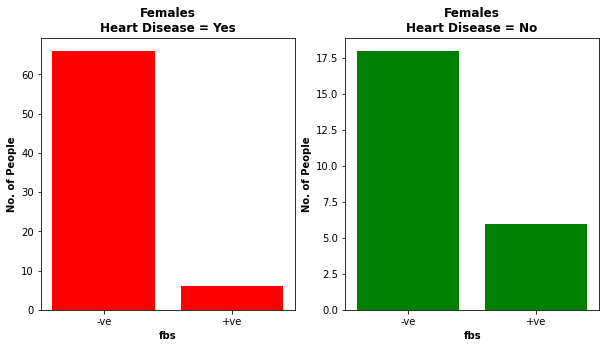

In [213]:
temp = heart_df.loc[heart_df['sex'] == 0]

bins = np.linspace(min(temp['fbs']), max(temp['fbs']), 3)
group_names = ['-ve', '+ve']

print("Bins:", bins)
print("Group Names:", group_names)

temp['fbs-bins'] = pd.cut(temp['fbs'], bins, labels=group_names, include_lowest=True)

temp = temp.sort_values(by=['fbs'], ascending=True)
temp = temp.reset_index(drop=True)

col_y = 'target'
targets = [temp.loc[temp[col_y] == val] for val in temp[col_y].unique()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title("Females\nHeart Disease = Yes", fontweight ="bold")
ax1.set_xlabel("fbs", fontweight ="bold")
ax1.set_ylabel("No. of People", fontweight ="bold")
ax1.bar(group_names, targets[0]['fbs-bins'].value_counts(), color='r')

ax2.set_title("Females\nHeart Disease = No", fontweight ="bold")
ax2.set_xlabel("fbs", fontweight ="bold")
ax2.set_ylabel("No. of People", fontweight ="bold")
ax2.bar(group_names, targets[1]['fbs-bins'].value_counts(), color='g')

plt.show()

<h4> 5. Thalach distribution w.r.t. target predictor column. </h4>
<em>
    Histogram shows red where target value is 1 (Heart disease = Yes) and blue in case of no.
</em>

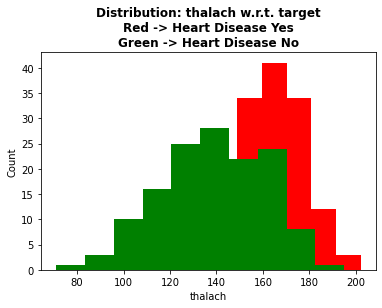

In [194]:
col_y = 'target'
targets = [heart_df.loc[heart_df[col_y] == val] for val in heart_df[col_y].unique()]

plt.title("Distribution: thalach w.r.t. target\nRed -> Heart Disease Yes\nGreen -> Heart Disease No", fontweight ="bold")

plt.xlabel("thalach")
plt.ylabel("Count")

plt.hist(targets[0]['thalach'], color='r')
plt.hist(targets[1]['thalach'], color='g')

plt.show()

<h2> Models </h2>

<h4> 1. Naive Bayes </h4>

In [195]:
x = heart_df.iloc[:,:-1].values # features (independent variables)  
y = heart_df.iloc[:, -1].values # label (dependent variable)

# Splitting the dataset into the Training set and Test set  
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.33, random_state = 0
)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (203, 13)
Testing split input-  (100, 13)


In [196]:
# Feature Scaling
sc = StandardScaler()  
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [197]:
# Training the Naive Bayes model on the training set
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [198]:
# Predict the test results
y_pred = nb_classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [199]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [200]:
# evaluate test results using confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print("Confusion Matrix\n", cm)
print("\nAccuracy score:", ac)
print("\nClassification report...\n\n", classification_report(y_test, y_pred))

Confusion Matrix
 [[36 12]
 [ 7 45]]

Accuracy score: 0.81

Classification report...

               precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.79      0.87      0.83        52

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



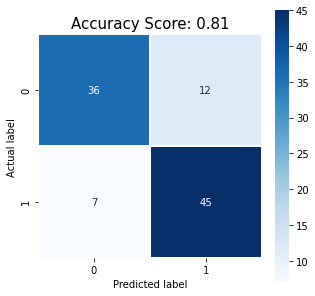

In [201]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='Blues')

title = 'Accuracy Score: {0}'.format(ac)
plt.title(title, size = 15)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

<h4> 2. K-Nearest Neighbors </h4>

In [202]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [203]:
y_pred1 = knn_classifier.predict(X_test)
y_pred1

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [204]:
# evaluate test results using confusion matrix and accuracy score
cm1 = confusion_matrix(y_test, y_pred1)
ac1 = accuracy_score(y_test, y_pred1)

print("Confusion Matrix\n", cm1)
print("\nAccuracy score:", ac1)
print("\nClassification report...\n\n", classification_report(y_test, y_pred1))

Confusion Matrix
 [[31 17]
 [15 37]]

Accuracy score: 0.68

Classification report...

               precision    recall  f1-score   support

           0       0.67      0.65      0.66        48
           1       0.69      0.71      0.70        52

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



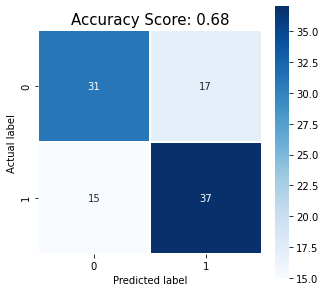

In [205]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(data=cm1, linewidths=.5, annot=True, square=True, cmap='Blues')

title = 'Accuracy Score: {0}'.format(ac1)
plt.title(title, size = 15)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [206]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

<h4> 3. Decision Tree </h4>

In [207]:
y_pred2 = dt_classifier.predict(X_test)
y_pred2

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [208]:
# evaluate test results using confusion matrix and accuracy score
cm2 = confusion_matrix(y_test, y_pred2)
ac2 = accuracy_score(y_test, y_pred2)

print("Confusion Matrix\n", cm2)
print("\nAccuracy score:", ac2)
print("\nClassification report...\n\n", classification_report(y_test, y_pred2))

Confusion Matrix
 [[38 10]
 [13 39]]

Accuracy score: 0.77

Classification report...

               precision    recall  f1-score   support

           0       0.75      0.79      0.77        48
           1       0.80      0.75      0.77        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



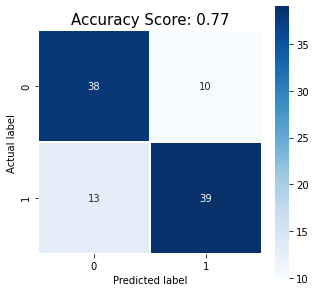

In [209]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(data=cm2, linewidths=.5, annot=True, square=True, cmap='Blues')

title = 'Accuracy Score: {0}'.format(ac2)
plt.title(title, size = 15)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()